# <center>  Linear and logistic regression - 03/11/2020</center> #

* <span style="color:red">Cours</span>            : MICAS911-Introduction-To-Statistic-Learning
* <span style="color:red">Auteur</span>           : Bournhar Abdelaziz
* <span style="color:red">Auteur</span>           : Panongbene Jean Mohamed Sawadogo
* <span style="color:red">Auteur</span>           : Yu Yeh

# <center> <span style="color:red"><font size="+3"> k-Nearest Neighbors and k-Means Clustering </font></span> </center> #



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
#from sklearn.model_selection import train_test_split

In [2]:
%matplotlib inline




# Part 1 Toy data set

In [3]:
#size per label 
N = 100

# Gaussian mean for distribution label 0
mu_label_0 = np.array([-1,0])

# Gaussian mean for distribution label 1
mu_label_1 = np.array([1,0])

# Gaussian mean for distribution label 2
mu_label_2 = np.array([0,1])

# standar deviation for Gaussian Distribution
sigma_ = 0.10 
matrix_cov =sigma_* np.array([[1, 0],[0, 1]])



In [51]:
def generate_data(N, mu_label_0, mu_label_1, mu_label_2, matrix_cov):
    """This function generate the data that we will use"""
    
    #Data Generate with Gaussain Distribution
    X1 = np.random.multivariate_normal(mu_label_0, matrix_cov, N//1)
    X2 = np.random.multivariate_normal(mu_label_1, matrix_cov, N//1)
    X3 = np.random.multivariate_normal(mu_label_2, matrix_cov, N//1)
    
    X = np.concatenate((X1,X2,X3),axis=0)

    # Label Generate
    Y1 = np.zeros(N//1, dtype=int)
    Y2 = np.ones(N//1, dtype=int)
    Y3 = 2*np.ones(N//1)
    
    Y = np.array(np.append(Y1,Y2))
    Y =  np.array(np.append(Y,Y3))
    
    return X, Y

#---------------------------------------------------------------------------------------------------------------#
def plot_Data(X, Y):
    """This function plot the Gaussian Distribution"""
    plt.figure(figsize=(20,10))
    plt.scatter(X[:,0], X[:,1], c=Y)
    plt.show()
#---------------------------------------------------------------------------------------------------------------#
def standard_deviation(E):
    """This function return the standart deviation"""
    E = np.array(E)
    
    e = np.sum(E)/E.shape[0]
    return np.sqrt((np.sum(E)-e) / E.shape[0]) 
#---------------------------------------------------------------------------------------------------------------#
def mixte_data(X,Y):
    """This function return the dataset and label mixted"""
    X_mixte = list()
    Y_mixte = list()
    indice = np.arange(start=0,stop=X.shape[0])
    np.random.shuffle(indice)
    
    for i in range(indice.shape[0]):
        X_mixte.append(X[indice[i]])
        Y_mixte.append(Y[indice[i]])
    
    return np.array(X_mixte), np.array(Y_mixte)
#---------------------------------------------------------------------------------------------------------------#
def split_data(X,Y,percentage_training):
    """We use this function to divide the data into %percentage_training of training data and 
    (1-percentage_training)% of testing data"""
    
    XX, YY = mixte_data(X,Y)
    kk = round(percentage_training*XX.shape[0])
    
    X_train = list()
    Y_train = list()
        
    X_test  = list()
    Y_test  = list()
    
    
    for k in range(kk):
        X_train.append(XX[k])
        Y_train.append(YY[k])
        
    for j in range(k,XX.shape[0]):
        X_test.append(XX[j])
        Y_test.append(YY[j])
    
    return np.array(X_train), np.array(X_test), np.array(Y_train), np.array(Y_test)
#---------------------------------------------------------------------------------------------------------------#


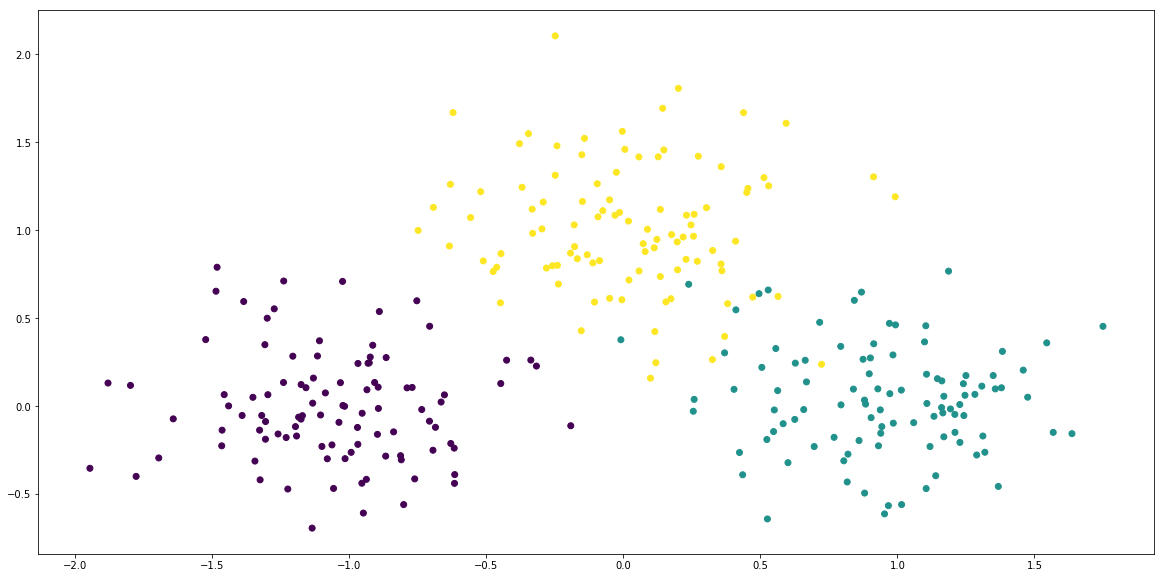

In [5]:
# Generation of the data
X,Y = generate_data(N, mu_label_0, mu_label_1, mu_label_2, matrix_cov)

# split data
X,Y = mixte_data(X,Y)

# split data
X_train, X_test, Y_train, Y_test = split_data(X, Y, 0.75)

plot_Data(X, Y)

# Working with the k-NN algorithm

## The K_NN algorithm

In [6]:
def K_NN_predict(X, Y, x_will_predict, k):
    """This function """
        
    neighbour = dict()
    
    for j in range(X.shape[0]):
        neighbour[j] = np.sqrt(np.sum((x_will_predict-X[j])*(x_will_predict-X[j])))
            
    #print(neighbour)
    k_nearest_neighbour = sorted(neighbour.items(), key=lambda t: t[1])[0:k]
    
    # list label
    label_list = list()
    
    for i in k_nearest_neighbour:
        label_list.append(Y[i[0]])
    
    get_the_label = dict()
    
    for i in label_list:
        if i in get_the_label:
            get_the_label[i]+=1
        else:
            get_the_label[i]=1
            
    get_the_label =  sorted(get_the_label.items(), key=lambda t: t[1])[0:k]
    
    return label_list[len(get_the_label)-1]
        

## Question 1

In [7]:
#size per label 
N = 100

# Gaussian mean for distribution label 0
mu_label_0 = np.array([-1,0])

# Gaussian mean for distribution label 1
mu_label_1 = np.array([1,0])

# Gaussian mean for distribution label 2
mu_label_2 = np.array([0,1])

# standar deviation for Gaussian Distribution
sigma_ = 0.10 
matrix_cov =sigma_* np.array([[1, 0],[0, 1]])

#different k_value
K_value = [1, 2, 5, 10]

# Generation of the data
X,Y = generate_data(N, mu_label_0, mu_label_1, mu_label_2, matrix_cov)

# split data
X_train, X_test, Y_train, Y_test = split_data(X, Y, 0.75)

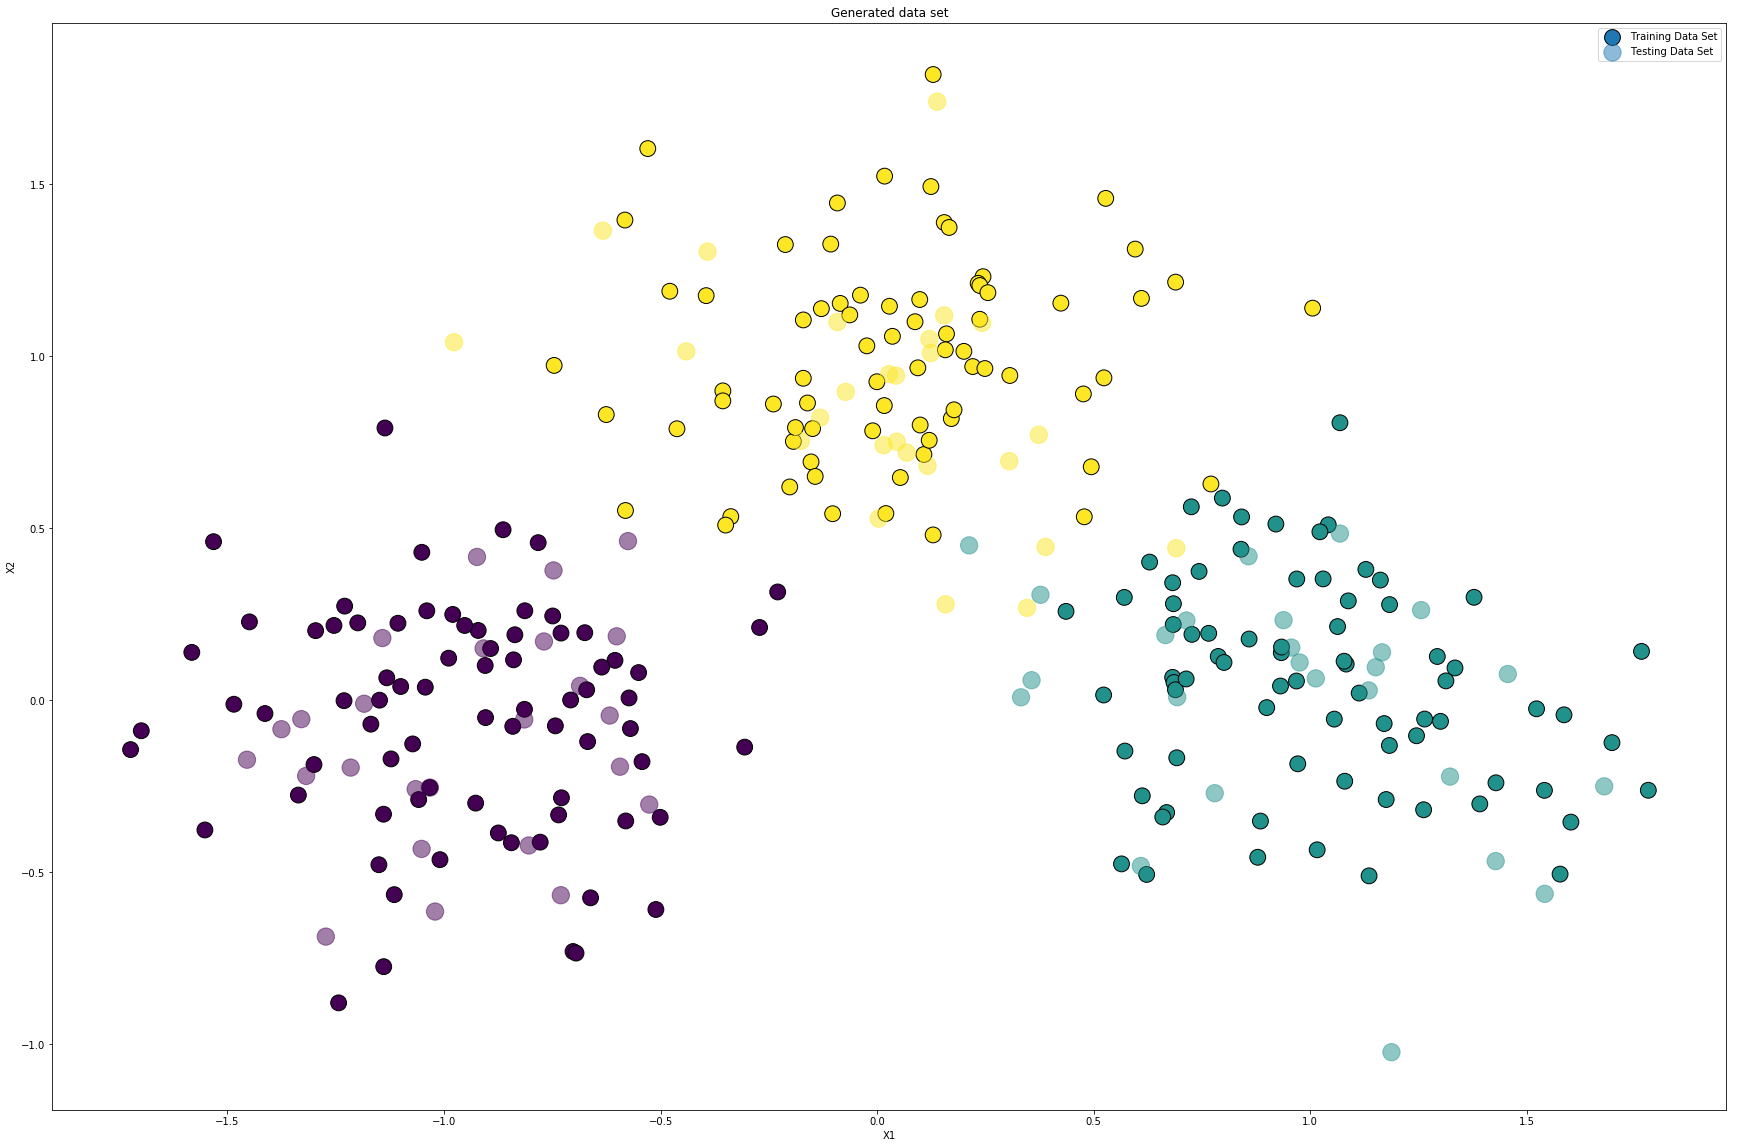

In [8]:
# show the dataset graph
plt.figure(figsize=(30,20))
plt.scatter(X_train[:,0], X_train[:,1], s=250, c=Y_train, alpha=1, edgecolors='black', label='Training Data Set')
plt.scatter(X_test[:,0], X_test[:,1], s=300, c=Y_test, alpha=0.5, label='Testing Data Set')
plt.title("Generated data set")
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

In [9]:
#Prediction 
accuracy = list()
prediction = dict()

for k in K_value:
    Y_pred = list()

    for i in X_test:
        Y_pred.append(int(K_NN_predict(X_train, Y_train, i, k)))
    
    prediction[k] = Y_pred
    accuracy.append(accuracy_score(np.array(Y_test),np.array(Y_pred) ))

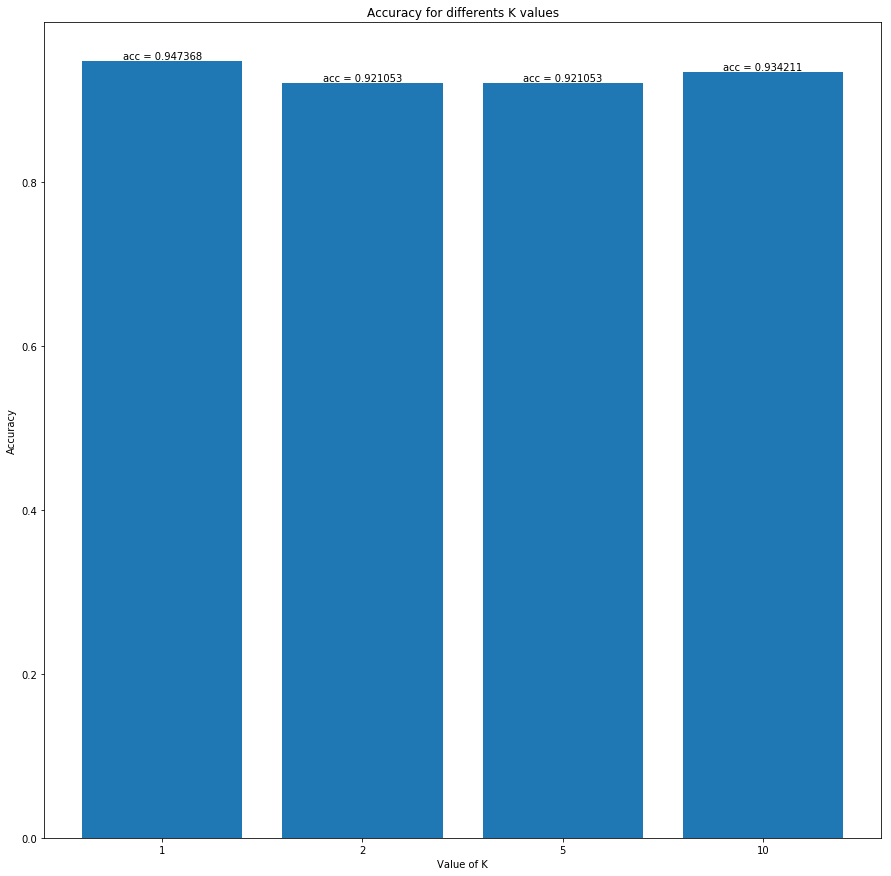

In [10]:
plt.figure(figsize=(15,15))

k_value = list()
for i in K_value:
    k_value.append(str(i))
    
unit = accuracy
 
plot = plt.bar(k_value, accuracy)
 
for value in plot:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2., height,'acc = %f' % height, ha='center', va='bottom')
 
plt.title("Accuracy for differents K values")
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
 
# show the graph
plt.show()

In [43]:
#Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])


# Question 2

In [57]:
#size per label 
N = 100

# Gaussian mean for distribution label 0
mu_label_0 = np.array([-1,0])

# Gaussian mean for distribution label 1
mu_label_1 = np.array([1,0])

# Gaussian mean for distribution label 2
mu_label_2 = np.array([0,1])

# noise variance sigma_2
sigma_2 = [0.15, 0.20, 0.25]

# for sigma equal 0.10
sigma_0 = 0.10

# k parameter
k_parameter = 1

In [58]:
# average error of the model
average_error_sigma_0 = 0.0

# standar deviation of the model
standard_deviation_sigma_0 = 0.0

# standar deviation for Gaussian Distribution for sigma equal 0 
matrix_cov =sigma_0* np.array([[1, 0],[0, 1]])
    
# average error of the model
average_error_= list()
    
for i in range(50):

    # standar deviation for Gaussian Distribution
    matrix_cov =sigma_* np.array([[1, 0],[0, 1]])
        
    # generate data sets
    X_train, Y_train = generate_data(N, mu_label_0, mu_label_1, mu_label_2, matrix_cov)
        
    # split data
    X_train, X_test, Y_train, Y_test = split_data(X, Y, 0.75)

    # knn prediction
    Y_pred = list()
    for i in X_test:
        Y_pred.append(int(K_NN_predict(X_train, Y_train, i, k_parameter)))
    
    # compute the error
    errors = np.abs(Y_pred-Y_test)
        
    average_error_.append(np.sum(errors)/len(Y_pred))
    
average_error_ = np.array(average_error_)
    
errors = 0
for i in range(average_error_.shape[0]):
    errors +=average_error_[i]
        
# average error 
average_error_sigma_0 = errors/50

# standard deviation sigma 0
standard_deviation_sigma_0 = standard_deviation(np.array(average_error_))

In [61]:
print("-----------------------standard_deviation_error Sigma_0 = 0.10 and k = 1 -----------------------")
print(average_error_sigma_0)
print("-----------------------error Sigma_0 = 0.10 and k = 1 -----------------------")
print(standard_deviation_sigma_0)

-----------------------standard_deviation_error Sigma_0 = 0.10 and k = 1 -----------------------
0.01824561403508772
-----------------------error Sigma_0 = 0.10 and k = 1 -----------------------
0.1337187412234574


In [48]:
# average error of the model
average_error_sigma= list()

# standar deviation of the model
standard_deviation_sigma = list()

for sigma in sigma_2:
    
    # standar deviation for Gaussian Distribution
    matrix_cov =sigma* np.array([[1, 0],[0, 1]])
    
    # average error of the model
    average_error_= list()
    
    for i in range(50):
        
        # standar deviation for Gaussian Distribution
        matrix_cov =sigma_* np.array([[1, 0],[0, 1]])
        
        # generate data sets
        X_train, Y_train = generate_data(N, mu_label_0, mu_label_1, mu_label_2, matrix_cov)
        
        # split data
        X_train, X_test, Y_train, Y_test = split_data(X, Y, 0.75)

        # knn prediction
        Y_pred = list()
        for i in X_test:
            Y_pred.append(int(K_NN_predict(X_train, Y_train, i, k_parameter)))
    
        # compute the error
        errors = np.abs(Y_pred-Y_test)
        
        average_error_.append(np.sum(errors)/len(Y_pred))
    
    average_error_ = np.array(average_error_)
    
    errors = 0
    for i in range(average_error_.shape[0]):
        errors +=average_error_[i]
        
    average_error_sigma.append(errors/50)
        
    standard_deviation_sigma.append(standard_deviation(np.array(average_error_)))


In [49]:
print("------------------------------------standard_deviation_error--------------------------------------")
print(average_error_sigma)
print("-------------------------------------------error--------------------------------------------------")
print(standard_deviation_sigma)


------------------------------------standard_deviation_error--------------------------------------
[0.022807017543859658, 0.018947368421052636, 0.017543859649122803]
-------------------------------------------error--------------------------------------------------
[0.14950209762067707, 0.13626599374984052, 0.13112201362143716]


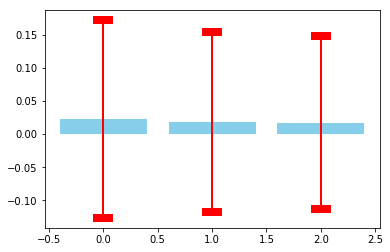

In [60]:
# plot the errors bar
values = average_error_sigma
errorValues = standard_deviation_sigma
plt.bar(range(len(values)), values, color = 'skyblue')
plt.errorbar(range(len(values)), values, yerr = errorValues,fmt = 'none', capsize = 10, ecolor = 'red', elinewidth = 2, capthick = 8)
plt.show()

# Working with k-Means Clustering